In [1]:
import pickle
import numpy as np
import pandas as pd

In [ ]:
# data = pickle.load(open('../data/stress_right_all_data.p','rb'))

In [ ]:
# data['aclstd'] = data['activity'].apply(lambda a:np.std(a))
# data['aclmean'] = data['activity'].apply(lambda a:np.mean(a))
# data.drop(['activity', 'rr'], axis=1, inplace=True)
# pickle.dump(data,open('../data/stress_right_all_data_purged.p','wb'))

In [2]:
data = pickle.load(open('../data/stress_right_all_data_purged.p','rb'))

In [3]:
data.head()

,window,likelihood_max,time,timestamp,likelihood_mean,localtime,stress_likelihood,stress_likelihood_ecg,day,version,user,aclstd,aclmean
0,"(2019-04-15 11:37:00, 2019-04-15 11:38:00)","[0.02, 0.5791666666666666, 0.13249999999999998...",1.555346e+09,2019-04-15 16:37:02.013073,0.164167,2019-04-15 10:37:02.013073,0.754312,NaN,20190415,2,460a483c-21fc-4ef6-a44a-740d43b81ed4,0.216164,0.157123
1,"(2019-04-15 13:02:00, 2019-04-15 13:03:00)","[0.005, 0.16166666666666665, 0.284666666666666...",1.555351e+09,2019-04-15 18:02:00.029060,0.406667,2019-04-15 12:02:00.029060,0.266222,NaN,20190415,2,460a483c-21fc-4ef6-a44a-740d43b81ed4,0.212637,0.196024
2,"(2019-04-15 14:31:00, 2019-04-15 14:32:00)","[0.0805, 0.535, 0.28, 0.005, 0.298333333333333...",1.555357e+09,2019-04-15 19:31:01.016940,0.419667,2019-04-15 13:31:01.016940,0.251904,NaN,20190415,2,460a483c-21fc-4ef6-a44a-740d43b81ed4,0.080450,0.124727
3,"(2019-04-15 15:13:00, 2019-04-15 15:14:00)","[0.35525, 0.39233333333333326, 0.1375, 0.29333...",1.555359e+09,2019-04-15 20:13:03.024916,0.109167,2019-04-15 14:13:03.024916,0.592187,NaN,20190415,2,460a483c-21fc-4ef6-a44a-740d43b81ed4,0.144914,0.124574
4,"(2019-04-15 19:36:00, 2019-04-15 19:37:00)","[0.09833333333333334, 0.1, 0.15666666666666668...",1.555375e+09,2019-04-16 00:36:00.025708,0.193333,2019-04-15 18:36:00.025708,0.161137,NaN,20190415,2,460a483c-21fc-4ef6-a44a-740d43b81ed4,0.049339,0.048949


In [ ]:
import matplotlib.pyplot as plt
%matplotlib notebook
def plot_day(data):
    data = data.sort_values('time').reset_index(drop=True)
    plt.figure(figsize=(12,8))
    plt.plot(data['localtime'],data['stress_likelihood'],'*-r')
    plt.plot(data['localtime'],data['stress_likelihood_ecg'],'o-b')
    plt.show()
data_all = [a for i,a in data.groupby(['user','day']) if a.dropna().shape[0]>100]

In [ ]:
# a = [plot_day(a) for a in data_all if a.dropna().shape[0]>200]

In [86]:
data_all = [a for i,a in data.groupby(['user','day']) if a.dropna().shape[0]>50]

In [87]:
from scipy.stats import pearsonr
def get_yield_correlation(data,quality1,quality2):
    temp = data.dropna()
    temp = temp[temp.likelihood_mean>=quality1]
    if temp.shape[0]<10:
        return [0]
    corr = pearsonr(temp['stress_likelihood'],temp['stress_likelihood_ecg'])[0]
    yld = data[data.likelihood_mean>=quality1].shape[0]
    return np.array([corr,yld,data.dropna().shape[0],np.round(100*quality1)])

In [88]:
results = []
for l in np.arange(0,1,.05):
    for df in data_all:
        m = get_yield_correlation(df,l,l+.1)
#         print(m)
        if np.sum(m)==0:
            continue
        results.append(m)
results = np.array(results)

C:\Users\mullah\AppData\Local\Continuum\miniconda3\envs\rr\lib\site-packages\scipy\stats\stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [89]:
results = pd.DataFrame(results,columns=['corr','yield','ecg_yield','quality'])

In [90]:
results.head()

,corr,yield,ecg_yield,quality
0,0.269400,589.0,67.0,0.0
1,0.747354,600.0,51.0,0.0
2,0.476210,542.0,323.0,0.0
3,0.097320,1131.0,280.0,0.0
4,0.185815,1107.0,312.0,0.0


<IPython.core.display.Javascript object>


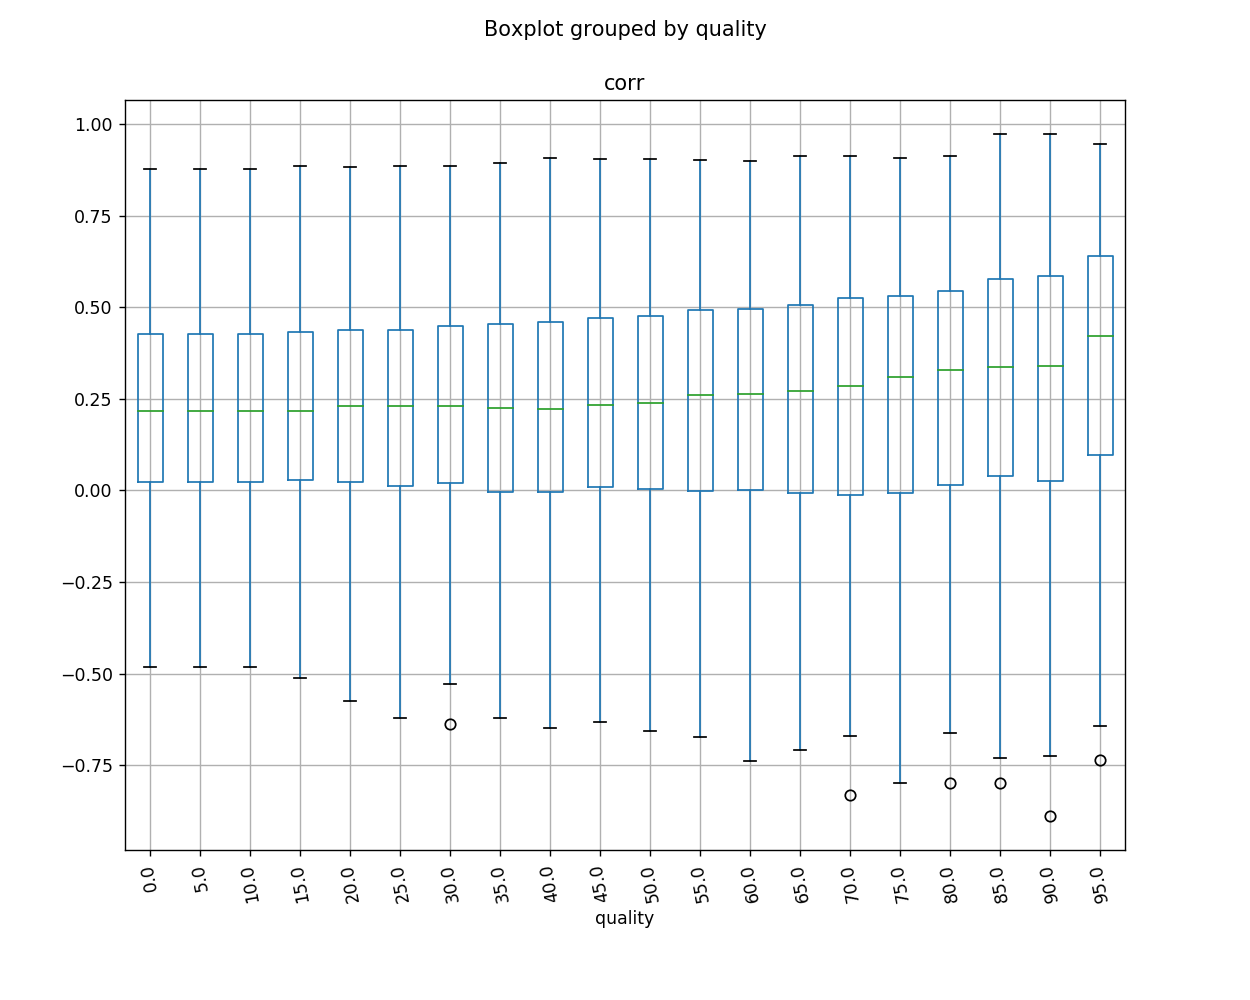

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 <a list of 20 Text xticklabel objects>)

In [92]:
import matplotlib.pyplot as plt
%matplotlib notebook
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
results.boxplot(column=['corr'], by='quality', ax=ax)
plt.xticks(rotation=100)